## Spreizer network in the Emulator

by Andrew Lehr on December 3rd, 2021

This is a demonstration of the Spreizer network implementation in the [Brian2Loihi Emulator](https://github.com/sagacitysite/brian2_loihi). It is based on [Leo Hiselius's Brian2 implementation of the Spreizer network](https://github.com/leohiselius/spreizer-net).

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from brian2_loihi import *
from loihi_spreizer_net import *
from utils import get_root, make_animation

### Parameters

In [3]:
root = get_root()                              # Get the absolute path
data_dir = root + '/saves/spike_monitors/'     # Where to store spike data
nPopE = params.network_dimensions['n_pop_e']   # Number of excitatory neurons in network
seed_value = 1                                 # Set seed, determines e.g. Perlin map
simtime = 1000                                 # Simulation time, Loihi timesteps
N = 1000                                       # Number of input neurons in spike generator
r = 200                                        # Firing rate of input neurons
T = simtime                                    # Input arrives throughout entire simulation

### Define Loihi Spreizer network

In [4]:
sn = LoihiSpreizerNet()                 # instantiate loihi spreizer net object
sn.set_seed(seed_value)                 # set the seed for e.g. perlin map
sn.populate()                           # populates the network with neurons on torus
sn.connect()                            # makes recurrent connections according to Perlin map
sn.connect_spike_generator(N, r, T)     # connect a spike generator with N neurons, firing rate r, time (0,T)
sn.connect_spike_monitors()             # connect the spike monitors

### Run simulation and save data

In [5]:
sn.run_sim(simulation_time=simtime)  
sn.save_monitors('loihi_spreizer_test')

### Build spike rasters

In [6]:
# first we build the spike raster, defining a window inside which spikes are summed
window = 20
n_bins = int(simtime/window)

In [7]:
spk_raster = np.zeros((nPopE, n_bins))
gs = np.load(data_dir + 'loihi_spreizer_test_e_i.npy')
ts = np.load(data_dir + 'loihi_spreizer_test_e_t.npy')
for j in range(n_bins): 
    mask = (ts>(j*window)) & (ts<((j+1)*window))
    spks = gs[mask]  
    spk_raster[:, j] = np.bincount(spks, minlength=nPopE)

### Plot example

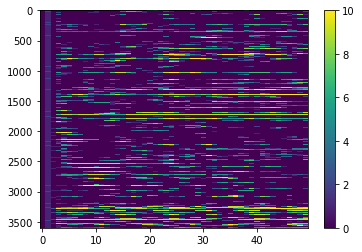

In [8]:
plt.figure()
plt.imshow(spk_raster, aspect='auto')
plt.colorbar()
plt.show()

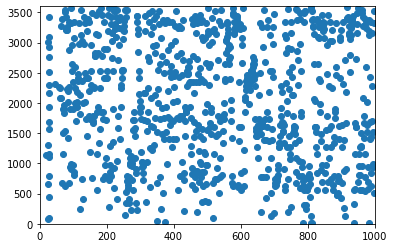

In [9]:
plt.figure()
plt.scatter(ts[np.arange(0,len(ts),200)], gs[np.arange(0,len(ts),200)])
plt.xlim(0,simtime)
plt.ylim(0,nPopE)
plt.show()

### Animation
Make video of activity in 2D space

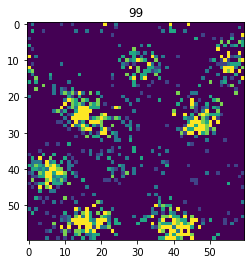

In [10]:
binsize = 10
fps = 10

gs = np.load(data_dir + 'loihi_spreizer_test_e_i.npy')
ts = np.load(data_dir + 'loihi_spreizer_test_e_t.npy')
        
output_file = 'loihi_spreizer_test'
make_animation(gs, ts, binsize, simtime, nPopE, output_file, fps)